# What factors are critical for mortgage applications?
September 15, 2019; Theresa Gebert

In [6]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import os


%matplotlib inline
plt.style.use('ggplot')

import os
os.getcwd()

'/Users/ericacollins'

## Introduction

**Business Context.** A mortgage is a loan to buy a home. Whether or not a potential buyer will be approved for a mortgage, and how much money they are approved for, can yield insights into the health of the real estate market. The requirements for mortgage application approval change over time. 

**Business Problem.** You are a researcher at a real estate firm and received the following e-mail from your boss this morning:

<img src=files/boss_email.jpeg width="800">

**Analytical Context.** *What information do I have? What information do I need? Do I have enough information?* These are crucial questions that all data scientists must ask themselves before beginning any analysis. In this case, you will be furthering your skills in gathering information and assessing information sufficiency. You will also be practicing skills you have previously learned in interpreting charts and figures and understanding basic data summaries. The dataset you will be using is Fannie Mae's single-family loan performance data.

The case is structured as follows: you will (1) first understand and clarify the question of interest; (2) get a sense for your ideal dataset, which is a crucial step prior to gathering information; (3) learn how to read through a data description; (4) determine the limitations of your dataset and assess its sufficiency for answering the question of interest; (5) explore the acquisition data through data summaries and plots; and (6) draw preliminary conclusions based on descriptive charts and figures.

<img src=files/mortgage-loan-application.jpg width="400">

## Understand and clarify the question of interest (20 minutes)

In an ideal world, the business user will always come to the data scientist with a well-posed question and a clean dataset. In reality, this is rarely the case. Diving straight into hunting for or analyzing data without having clear, specific question(s) to answer is a common mistake. This is why the first step in the data scientist's pipeline is understanding and clarifying the question of interest.

Recall the question of interest:

> **What factors are critical for a mortgage loan application?**

Notice that this question is not specific enough for you to gather information. For instance, does your boss care about factors that contribute to the loan *being approved*, or factors that contribute to *the borrower’s performance in paying back the loan*? Does your boss care about loans across the U.S. or just in a particular state or region?


### Question:
Spend 2 - 3 minutes brainstorming a list of questions you might want to ask your boss.


There are two primary ways to clarify a question of interest. Sometimes it is helpful to dissect almost every single word in the question and demand **specificity**. For example, what does "critical" mean to your boss? Sometimes it is helpful to demand **measurability**. For example, how does your boss measure the outcome of a "mortgage loan application"? In the exercise below, we'll explore various questions you could ask your boss and whether they are good questions or not.


### Exercise 1:

#### 1.1
One of the questions you ask your boss needs to clarify the *outcome* of interest. *What* part of the mortgage loan application outcome do you care about? Which of the following are examples of "good" (specific and measurable) mortgage loan application outcomes? Select all that apply.

(a) Whether or not the loan is approved at all;

(b) Whether or not the loan is approved for the full amount initially requested;

(c) The borrower's performance in paying back the loan;

(d) None of these options are examples of "good" (specific and measurable) outcomes.


#### 1.2
Another question you ask your boss needs to clarify the *population* of interest. *Whose* mortgage loan applications do you care about? Which of the following are examples of clarifying questions for whose mortgage loan applications your boss might care about?

(a) Mortgage applications from across the entire U.S. or just in a particular state or region?

(b) Mortgage applications for single-family homes or also multi-family homes?

(c) Mortgage applications from single mothers or all households?

(d) All of the above are good examples of clarifying questions.


#### 1.3
Lastly, a question to ask your boss, needs to clarify what they mean by *factors*. Your boss may have something specific in mind when they say this and a good way to ensure you understand what they mean is to give examples of factors you are thinking of incorporating in your analysis. For each of the following categories of factors, give an example of a specific factor you might want to measure. The first one has been done for you.

1. Demographic features of the applicant? **gender**
2. Credit history of the applicant?
3. Timing of the application?
4. Features of the home being purchased?
5. Repayment structure of the mortgage being requested?


## Know your ideal dataset (20 minutes)

Now, suppose you've gone through the above exercise with your boss, and that they have clarified they want to answer the question:

> **Which factors of single-family mortgage applications in the U.S. are most related to that loan being paid back on time?**

With our question in hand, the next logical step is *knowing what data we need to answer that question*; i.e. **information gathering**. Oftentimes, it is helpful to imagine your ideal dataset before hunting for datasets or diving into analyzing a dataset you have been given. For example, if the question of interest were simply "What is the correlation between the size of the mortgage (in USD) and the time (in weeks) it takes to pay it back?" then our ideal dataset should have AT LEAST the following columns:

```
___________________________________
loan_amount_usd | weeks_to_pay_back
```

In general, we want data that is as granular as possible. For example, if we are interested in trends over time, then all else equal, when we compare data recorded at a daily level vs. at a monthly level, we will prefer the daily-level data. If we are interested in trends across people, the ideal dataset will have samples from a large number of diverse individuals.

However, there are two important caveats to "more is better":

1. Having a representative sample is even more important than having a large sample. (You will learn more about how to formally assess representativeness in future cases.)
2. Collecting more data often involves significantly more work. Sometimes, it may be necessary to make trade-offs whereby you go with a decent but not ideal dataset, rather than an ideal dataset which is very difficult or impossible to get all the data for. (You will learn more about this in future cases.)

### Exercise 2:

#### 2.1
Reread the clarified question of interest. All else equal, would you rather have a dataset on single-family mortgage applications containing:

(a) 10,000 applications from all across the U.S.;

(b) 250,000 applications from all across the U.S.; X, asking about mortgage repayment across the US

(c) 500,000 applications from only California; -- dataset not representative

(d) all applications on multi-family mortgage applications.


#### 2.2
The ideal dataset should definitely include the outcome of interest (e.g. call it ``paid_back_on_time``) and as many factors as possible that could influence this outcome, such as:
```
__________________________________________________________________________________________________________
borrower_credit_score | loan_amount_usd | zipcode | borrower_first_time_mortgage | ... | paid_back_on_time
```

Based on the clarified question of interest, how many values can ``paid_back_on_time`` take on?

(a) 1

(b) 2 - yes or no - binary output, +1, -1

(c) any non-negative integer

(d) any non-negative number


## Read and understand the data description (30 minutes)

In order to answer the question above, your boss advises you to analyze the Fannie Mae Loan Performance Data (Single-Family Loan Performance credit dataset from mortgage loan provider Fannie Mae with performance data through Q4 2018). You can download a sample and full version of the public dataset [here](https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html).

It is a waste of time to analyze bad data, so in future cases you will also learn to evaluate **data quality**. While we will not dive into this too much here, understanding these aspects of the data is crucial for proper **data cleaning**. Good datasets, especially when made available for public use, have documentation that describes the variables in the dataset, how the data was collected, when and how it is updated, etc.

You can view a PDF of the data description [here](https://loanperformancedata.fanniemae.com/lppub-docs/FNMA_SF_Loan_Performance_File_layout.pdf) and a glossary of the features [here](https://loanperformancedata.fanniemae.com/lppub-docs/FNMA_SF_Loan_Performance_Glossary.pdf).

<img src="files/acquisition_file_layout.png" width=500>



Many datasets will include a unique ID for each entry. In this case, every entry is a unique loan, and so the first column in the dataset is the `LOAN IDENTIFIER`, an alphanumeric ID for each loan. Notice what each variable is meant to represent and which variables are permitted to have missing values. For instance, do you know what the difference is between `LOAN-TO-VALUE` and `COMBINED LOAN-TO-VALUE`? Do you know the values that `LOAN PURPOSE` can take on and what it is meant to represent?

After reading through the data descriptions, answer the questions below.

### Exercise 3:
#### 3.1
Fannie Mae updates its data based on ongoing quality assurance efforts. ``TRUE`` or ``FALSE``?


#### 3.2
If Fannie Mae updates its data, how do corrections affect the dataset?

(a) Corrections can only result in additions of mortgage loans.

(b) Corrections can only result in removals.

(c) Corrections can result in additions or removals. X

(d) The website does not state how corrections can affect the dataset.


#### 3.3
What does Fannie Mae do with its datasets when data is missing or unavailable?

(a) It removes the entire data entry.

(b) It leaves those values blank. X

(c) It replaces those values with the word "missing."

(d) The website does not state how missing or unavailable values are handled.


## Know your data's limitations (20 minutes)

Now, let's consider the types of borrowers included in the data. (In later cases, you will learn about the *population* of interest vs. the particular *sample* available to you). An important consideration in **information sufficiency** is which questions you can and cannot answer using this dataset. Generally, you do not want to attempt to answer questions you do not have *any* information about. For instance, if someone asks you how to ride a motorcycle and you have no idea how to ride a motorcycle, you will probably say, "I don't know." What is tricky in data science is that sometimes we have *some* but not *all* of the information, and it will be up to you to determine whether you have enough.

For now, we will just consider the types of borrowers and loans included in this dataset. If certain borrowers and loans are not included in the dataset, we need to be more cautious about answering any questions about them. Even for the borrowers included in the data, we need to ask ourselves: *How representative is the population of individuals taking out Fannie Mae mortgage loans of the general population taking out mortgages?*

Additionally, notice that this dataset is only a subset of the mortgages Fannie Mae claims to include:
> The... [primary] dataset is a subset of Fannie Mae’s 30-year and less, fully amortizing, full documentation, single-family, conventional fixed-rate mortgages

So even if Fannie Mae mortgage loan applicants are representative, is the *subset* taken for this dataset representative? You will learn more about formal methods to assess representativeness in future cases, but it is useful to keep some of these questions in mind as you gather information. Read through the Fannie Mae Loan Performance Data description (you can find FAQ [here](https://loanperformancedata.fanniemae.com/lppub-docs/FNMA_SF_Loan_Performance_FAQs.pdf)) and answer the questions below.

### Exercise 4:

#### 4.1
What borrowers are **not** in this dataset and are therefore not included in your analysis? Select all that apply.

1. Borrowers who are not borrowing from Fannie Mae.
2. Borrowers for single-family homes.
3. Borrowers for multi-family homes.
4. Borrowers with fixed-rate mortgages.
5. Borrowers with adjustable-rate mortgages.
6. Borrowers with government-issued mortgages.
7. Borrowers with mortgages originating prior to 1999.

#### 4.2
Why were certain mortgage loans, such as Alt-A or other mortgage loans with reduced documentation or streamlined processing, excluded from the dataset?

(a) Fannie Mae forgot to include them and it is too difficult to include them retroactively.

(b) Fannie Mae does not have data on these mortgage loans.

(c) Fannie Mae wanted to make the dataset more representative of current underwriting guidelines.

(d) The website does not state why these loans were excluded.


#### 4.3
Which of the following questions should **not** be answered using this dataset alone? Select all that apply.

1. What factors are critical for someone to decide against applying for a mortgage loan in the first place?
2. What factors influence a borrower's credit score the most?
3. What causes a Fannie Mae borrower to default on their mortgage?
4. How often do Fannie Mae borrowers make late payments?


## Exploring the acquisition data (30 minutes)

Now that we understand our question of interest and have gathered some promising data, we will begin to explore the factors related to mortgage acquisition. We will practice previously developed skills in reading summary tables, charts, and graphs, and will focus on the *acquisition data* provided by Fannie Mae, which provides loan-level information about mortgages acquired.

Read through the summary statistics provided on this dataset [here](https://loanperformancedata.fanniemae.com/lppub-docs/FNMA_SF_Loan_Performance_Stat_Summary_Primary.pdf).

<img src="files/summary_statistics.png" width=800>

Do any of the charts and numbers point to information that is useful for answering the question of interest? Use the table above to help you answer the questions below.

### Exercise 5:

#### 5.1
Which trend, if any, do you observe in the average borrower's credit score over time?

(a) Average borrower's credit score is roughly increasing;

(b) Average borrower's credit score is roughly decreasing;

(c) Average borrower's credit score roughly stays the same;

(d) None of the above.


---

It is likely that average borrower's credit score is a factor that is highly related to whether a loan is paid back on time. Since our data exploration so far has shown that there seems to be a trend in the average borrower's credit score over time, we should consider focusing on a narrower time period in order to identify factors critical for mortgage applications.

---

#### 5.2
Notice that the average co-borrower's credit score tends to be higher than the average borrower's credit score. Is this surprising? Why or why not?

---

Similarly, the co-borrower's credit score is likely an important factor for whether a mortgage is paid back on time. Notice that while we may have a guess for the relationship between a borrower's and co-borrower's credit score, these summary statistics do not provide enough detail to determine how they are related to each other.

Next, we will focus on a narrower time period, and we will look into individual loans vs. summary statistics. Using code provided to you, we will load in a dataset about loan acquisitions, make a few plots, and interpret them. The full dataset includes 39 million mortgage loan applications. Here we will explore a subset from 2018 Q2. Please run the code in each cell and answer the associated questions.

In [7]:
AcqData = pd.read_table('files/Acquisition_2018Q2.txt', sep="|", header=None)

# What the names of the columns should be (provided in the data documentation)
acq_header_names = ["LOAN_IDENTIFIER",
                    "ORIGINATION_CHANNEL",
                    "SELLER_NAME",
                    "ORIGINAL_INTEREST_RATE",
                    "ORIGINAL_UPB",
                    "ORIGINAL_LOAN_TERM",
                    "ORIGINATION_DATE",
                    "FIRST_PAYMENT_DATE",
                    "ORIGINAL_LTV",
                    "ORIGINAL_COMB_LTV",
                    "NUMBER_OF_BORRWERS",
                    "ORIGINAL_DEBT_TO_INCOME_RATIO",
                    "BORROWER_CREDIT_SCORE_ORIG",
                    "FIRST_TIME_HOME_BUYER_IND",
                    "LOAN_PURPOSE",
                    "PROPERTY_TYPE",
                    "NUMBER_OF_UNITS",
                    "OCCUPANCY_TYPE",
                    "PROPERTY_STATE",
                    "ZIP_CODE_SHORT",
                    "PRIMARY_MORTGAGE_INSURANCE_PERCENT",
                    "PRODUCT_TYPE",
                    "COBORROWER_CREDIT_SCORE_ORIG",
                    "MORTGAGE_INSURANCE_TYPE",
                    "RELOCATION_MORTGAGE_IND"]
AcqData.columns = acq_header_names

AcqData.head()

,LOAN_IDENTIFIER,ORIGINATION_CHANNEL,SELLER_NAME,ORIGINAL_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,ORIGINATION_DATE,FIRST_PAYMENT_DATE,ORIGINAL_LTV,ORIGINAL_COMB_LTV,...,PROPERTY_TYPE,NUMBER_OF_UNITS,OCCUPANCY_TYPE,PROPERTY_STATE,ZIP_CODE_SHORT,PRIMARY_MORTGAGE_INSURANCE_PERCENT,PRODUCT_TYPE,COBORROWER_CREDIT_SCORE_ORIG,MORTGAGE_INSURANCE_TYPE,RELOCATION_MORTGAGE_IND
0,100000274788,C,PENNYMAC CORP.,4.250,271000,360,05/2018,07/2018,75,75,...,SF,1,P,IA,500,NaN,FRM,NaN,NaN,N
1,100001584442,C,"FLAGSTAR BANK, FSB",4.625,342000,360,03/2018,05/2018,53,91,...,PU,1,P,AZ,852,NaN,FRM,NaN,NaN,N
2,100002839546,C,OTHER,4.750,335000,360,03/2018,05/2018,77,77,...,PU,1,P,TX,750,NaN,FRM,NaN,NaN,N
3,100007968800,R,OTHER,4.500,279000,360,05/2018,07/2018,95,95,...,SF,1,P,AR,727,30.0,FRM,NaN,1.0,N
4,100014865042,R,FREEDOM MORTGAGE CORP.,4.125,344000,180,03/2018,05/2018,80,80,...,SF,1,P,NH,31,NaN,FRM,746.0,NaN,N


/Users/ericacollins/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


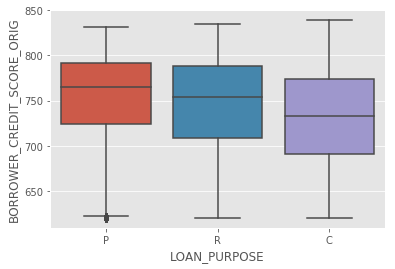

In [8]:
sns.boxplot(x = 'LOAN_PURPOSE', y = 'BORROWER_CREDIT_SCORE_ORIG', data = AcqData)

The codes for loan purpose mean the following:

```
C = construction (build a new house)
P = purchase (buy an existing house)
R = refinance (switch to a different loan)
```

#### 5.3
Based on the plot above, how would you describe the distribution of borrowers' credit scores for loan applications with the purpose of **construction**?

(a) The distribution looks roughly symmetric;

(b) The distribution looks roughly right-skewed;

(c) The distribution looks roughly left-skewed;

(d) Cannot tell from the plot provided.


#### 5.4
Based on the plot above, how would you describe the distribution of borrower's credit scores for loan applications with the purpose of construction vs. purchasing? Select all that apply.

(a) The distributions look the same;

(b) The borrower's credit scores appear significantly higher for homes for purchase;

(c) The borrower's credit scores appear significantly lower for homes for purchase;

(d) Cannot tell from the plot provided.


Recall earlier that the data summaries table indicated that the average co-borrower's credit score was higher than the average borrower's credit score. We will dive into this information at the loan level rather than summary statistics to see whether co-borrowers' credit scores are an important factor to consider for mortgage repayment.

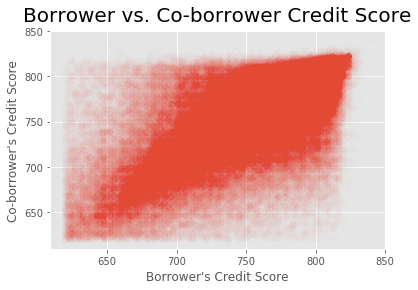

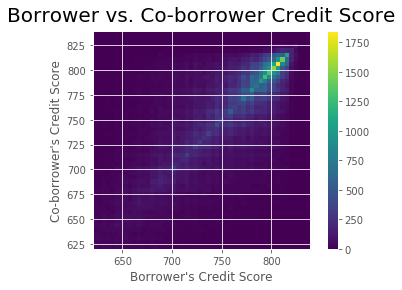

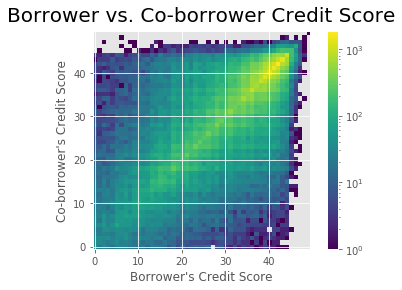

In [9]:
from matplotlib.colors import LogNorm

x = AcqData['BORROWER_CREDIT_SCORE_ORIG']
y = AcqData['COBORROWER_CREDIT_SCORE_ORIG']

x = x[~np.isnan(y)] #is it not a number and removing them
y = y[~np.isnan(y)]

y = y[~np.isnan(x)]
x = x[~np.isnan(x)]

plt.scatter(x,y,alpha=0.01)
plt.title("Borrower vs. Co-borrower Credit Score", fontsize=20, verticalalignment='bottom')
plt.xlabel("Borrower's Credit Score")
plt.ylabel("Co-borrower's Credit Score")
plt.show()

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.colorbar()
plt.title("Borrower vs. Co-borrower Credit Score", fontsize=20, verticalalignment='bottom')
plt.xlabel("Borrower's Credit Score")
plt.ylabel("Co-borrower's Credit Score")
plt.show()

plt.clf()
plt.imshow(heatmap.T, norm=LogNorm(), origin='lower')
plt.colorbar()
plt.title("Borrower vs. Co-borrower Credit Score", fontsize=20, verticalalignment='bottom')
plt.xlabel("Borrower's Credit Score")
plt.ylabel("Co-borrower's Credit Score")
plt.show()

Notice that all three of these plots are displaying the same exact data in different ways. Since there are so many data points, adjusting the opacity of your points or applying gradients can make them easier to see. From these plots, it appears that borrower's credit score and co-borrower's credit score are generally highly related: when the borrower's credit score is high, the co-borrower's is high; when the borrower's credit score is low, the co-borrower's is low.

*What have we learned about important factors for mortgage acquisitions so far?* We know from domain knowledge that credit scores are likely important factors in determining mortgage repayment. We can therefore think of a borrower's credit score as a proxy for likelihood of mortgage repayment. Based on what we have seen from the acquisition data, before even looking at mortgage performance, we know that credit scores appear not to differ substantially based on loan purpose, so perhaps this is not an important factor. Additionally, when we looked into more granular data, we saw that co-borrowers' credit scores are not always higher than borrowers' credit scores as we initially suspected. This suggests the co-borrower's credit score may be an important factor to consider in mortgage repayment, independent of the borrower's credit score.

## Drawing conclusions from the performance data (30 minutes)

Now, let's use some of the factors we explored for mortgage acquisition to analyze mortgage performance. We will continue to practice reading graphs, but now we will focus on the *performance data* provided by Fannie Mae, which provides loan-level information about mortgage repayment. We will assess information sufficiency to propose initial factors of interest to our boss that are related to a mortgage being repaid on time.

Using code provided to you, we will load in a dataset about loan performance, make a few plots, and interpret them. Here we will continue to explore a subset from 2018 Q2. Please run the code in each cell and answer the associated questions.

In [10]:
PerfData = pd.read_table('files/Performance_2018Q2.txt', sep="|", header=None)

# What the names of the columns should be (provided in the data documentation)
perf_header_names = ["LOAN_IDENTIFIER",
                     "MONTHLY_REPORTING",
                     "SERVICER_NAME",
                     "CURRENT_INTEREST_RATE",
                     "CURRENT_ACTUAL_UPB",
                     "LOAN_AGE",
                     "REMAINING_MONTHS_TO_LEGAL_MATURITY",
                     "ADJUSTED_MONTHS_TO_MATURITY",
                     "MATURITY_DATE",
                     "METROPOLITAN_STATISTICAL_AREA",
                     "CURRENT_LOAN_DELINQUENCY_STATUS",
                     "MODIFICATION_FLAG",
                     "ZERO BALANCE_CODE",
                     "ZERO BALANCE_EFFECTIVE",
                     "LAST_PAID_INSTALLMENT",
                     "FORECLOSURE_DATE",
                     "DISPOSITION_DATE",
                     "FORECLOSURE_COSTS",
                     "PROPERTY PRESERVATION_AND_REPAIR_COSTS",
                     "ASSET_RECOVERY_COSTS",
                     "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                     "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY",
                     "NET_SALE_PROCEEDS",
                     "CREDIT_ENHANCEMENT_PROCEEDS",
                     "REPURCHASE_MAKE_WHOLE_PROCEEDS",
                     "OTHER_FORECLOSURE_PROCEEDS",
                     "NON_INTEREST_BEARING_UPB",
                     "PRINCIPAL_FORGIVENESS_AMOUNT",
                     "REPURCHASE_MAKE_WHOLE_PROCEEDS_FLAG",
                     "FORECLOSURE_PRINCIPAL_WRITE-OFF_AMOUNT",
                     "SERVICING_ACTIVITY_INDICATOR"]
  
PerfData.columns = perf_header_names

PerfData.head()

,LOAN_IDENTIFIER,MONTHLY_REPORTING,SERVICER_NAME,CURRENT_INTEREST_RATE,CURRENT_ACTUAL_UPB,LOAN_AGE,REMAINING_MONTHS_TO_LEGAL_MATURITY,ADJUSTED_MONTHS_TO_MATURITY,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,...,ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY,NET_SALE_PROCEEDS,CREDIT_ENHANCEMENT_PROCEEDS,REPURCHASE_MAKE_WHOLE_PROCEEDS,OTHER_FORECLOSURE_PROCEEDS,NON_INTEREST_BEARING_UPB,PRINCIPAL_FORGIVENESS_AMOUNT,REPURCHASE_MAKE_WHOLE_PROCEEDS_FLAG,FORECLOSURE_PRINCIPAL_WRITE-OFF_AMOUNT,SERVICING_ACTIVITY_INDICATOR
0,100000274788,06/01/2018,PENNYMAC CORP.,4.25,NaN,0,360,360.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,100000274788,07/01/2018,NaN,4.25,NaN,1,359,359.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
2,100000274788,08/01/2018,NaN,4.25,NaN,2,358,357.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,100000274788,09/01/2018,NaN,4.25,NaN,3,357,356.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,100000274788,10/01/2018,NaN,4.25,NaN,4,356,354.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


Above you can see the first five rows of the dataset we are investigating.

In [11]:
# This will take a few seconds to run
print(sum(PerfData['ADJUSTED_MONTHS_TO_MATURITY'] == 0))

18173


The line above shows us that there are over 18,000 loans in this dataset from Q2 2018 where the adjusted months to maturity is zero. For the purpose of this case, we will consider these loans to be ones where payment was not delivered on time. In other words, we will treat this as the outcome of interest (`True` means that the loan was paid back on time, `False` means the loan was not paid back on time).

In [12]:
PerfData['LOAN_REPAID_ON_TIME'] = PerfData['ADJUSTED_MONTHS_TO_MATURITY'] != 0

### Exercise 6:
Recall that these are the factors we believe are related to mortgage repayment based on the acquisition dataset and domain knowledge:
1. borrower's credit score
2. co-borrower's credit score (*sometimes highly related to borrower's credit score, sometimes not*)
3. loan purpose (*maybe; though not clearly related to credit score, may still be important*)

In the next three questions, you will assess how current interest rate, current actual UPB (unpaid principal balance), and the age of the loan are related to whether or not the loan is repaid on time.

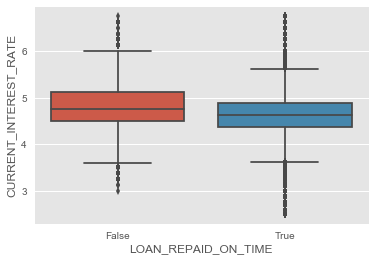

In [10]:
sns.boxplot(x = 'LOAN_REPAID_ON_TIME', y = 'CURRENT_INTEREST_RATE', data = PerfData)
plt.show()

#### 6.1
Based on the plot above, how would you describe the difference between the distribution of current interest rates for mortgages repaid on time vs. that for mortgages not repaid on time?

(a) Mortgages repaid on time tend to have significantly lower interest rates;

(b) Mortgages repaid on time tend to have slightly lower interest rates;

(c) Mortgages repaid on time tend to have the same interest rates, with some outliers significantly lower;

(d) Cannot tell from the plot provided.


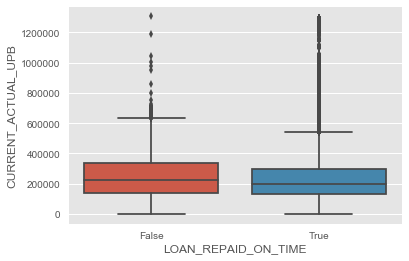

In [11]:
sns.boxplot(x = 'LOAN_REPAID_ON_TIME', y = 'CURRENT_ACTUAL_UPB', data = PerfData)
plt.show()

#### 6.2
Based on the plot above, how would you describe the difference between the distribution of current actual UPB for mortgages repaid on time vs. that for mortgages not repaid on time?

(a) Mortgages repaid on time tend to have significantly higher UBPs;

(b) Mortgages repaid on time tend to have slightly higher UBPs;

(c) Mortgages repaid on time tend to have the same UBPs;

(d) Cannot tell from the plot provided.



*Note: something unusual about this plot that requires further investigation into the data is that it appears there are some loans identified as not having been paid back on time, but the unpaid principal balance is zero.*

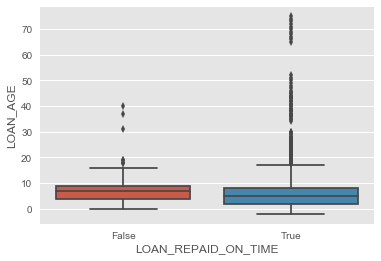

In [12]:
sns.boxplot(x = 'LOAN_REPAID_ON_TIME', y = 'LOAN_AGE', data = PerfData)
plt.show()

#### 6.3
Based on the plot above, how would you describe the difference between the distributions of the loans' age for mortgage repaid on time vs. not?

(a) Mortgages repaid on time are significantly older;

(b) Mortgages repaid on time are slightly older;

(c) Mortgages repaid on time tend to be the same age, with some outliers significantly older;

(d) Cannot tell from the plot provided.



## Conclusions

We worked with Fannie Mae's single-family loan performance data to begin exploring which factors of single-family mortgage applications in the U.S. are most related to loans being paid back on time. Based on domain knowledge and information in the acquisition and performance datasets provided by Fannie Mae, we will let our boss know that the factors related to mortgage performance appear to be complicated. In our univariate exploration, we could not identify obvious differences between current interest rate, current actual UPB (unpaid principal balance), and the age of the loan for mortgages paid back on time vs. late. In our exploration of the relationship between borrower's and co-borrower's credit scores, we saw both a strong positive trend but also great variability.

Furthermore, we saw that the data provided by Fannie Mae is not sufficient to answer the question of interest, since so many values are missing and only ~30 factors were collected that could be analyzed for their relationship to loan performance.

## Takeaways

In this case, you developed your skills in gathering information and assessing information sufficiency. Crucially, we learned that before doing ANY analysis of the data, we ought to:

1. Understand and clarify the question of interest. In practical business settings, questions are often posed in a vague manner and they must be made more specific to even be useful. 
2. Know what our ideal dataset should look like before expending valuable time and effort in hunting for new datsets or analyzing an existing dataset.
3. Identify capabilities and limitations of our datasets, so that we know what we can and cannot conclude and act upon in a business setting once we finish our analysis.

We also learned that there are additional steps in the data science process that we will explore in future cases, such as data cleaning, generating plots, and formal calculations to assess sample size sufficiency, test hypotheses, and predict outcomes of interest.